In [1]:
# import the needed packages and check version
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("tensorflow: ", tf.__version__) #1.14.0

tensorflow:  1.14.0


In [2]:
#import the fashion mnist dataset (from Zalando)
fashion_mnist = keras.datasets.fashion_mnist
data = fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = data
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#preprocess the data
train_x = np.expand_dims(train_images/255.0, axis=3)
train_y = train_labels
test_y = test_labels
test_x = np.expand_dims(test_images/255.0, axis=3)

## prepare data and exclude one class

exclude one class and get this class seperately from the test set to test later

In [5]:
nine_x = test_x[np.where(test_y==9)[0]]
nine_y = test_y[np.where(test_y==9)[0]]

zero_x = test_x[np.where(test_y==0)[0]]
zero_y = test_y[np.where(test_y==0)[0]]

In [6]:
train_x = np.delete(train_x, np.where((train_y==9))[0], axis = 0)
train_y = np.delete(train_y, np.where(train_y==9)[0], axis = 0)

In [7]:
train_y = np.array(pd.get_dummies(train_y))

In [8]:
test_x_reduced = np.delete(test_x, np.where((test_y==9))[0], axis=0)
test_y_reduced = np.delete(test_y, np.where((test_y==9))[0], axis=0)

In [9]:
test_y_reduced = np.array(pd.get_dummies(test_y_reduced))

In [10]:
#adjust labels
class_names_adj = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag']

## construct a baseline CNN

In [14]:
# Construct a baseline CNN

model_b = keras.Sequential([
    keras.layers.Convolution2D(8, kernel_size=(3,3), padding="same", activation='relu', input_shape=(28,28,1)),
    keras.layers.Convolution2D(8, kernel_size=(3,3), padding="same", activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Convolution2D(16, kernel_size=(3,3), padding="same", activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dropout((0.5)),
    keras.layers.Dense(9, activation='softmax')
])

model_b.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_b.summary()

history_b = model_b.fit(train_x, train_y, epochs = 10)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_b.history['acc'])
#plt.plot(history_b.history['val_accuracy'])
plt.ylim(0,1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history_b.history['loss'])
#plt.plot(history_b.history['va_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 8)         584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 9)                

KeyboardInterrupt: 

In [13]:
model_b.evaluate(test_x_reduced, test_y_reduced) #test the network with adjusted test set

9000/9000 [==============================] - 4s 410us/sample - loss: 2.3807 - acc: 0.2186s - loss: 2.3792 - acc: 0.


[2.380683449215359, 0.21855555]

In [45]:
model_b.save('A_008_model_b.h5') #save the model

In [12]:
model_b = tf.keras.models.load_model('A_model_b.h5')

W1206 10:09:06.233506 19688 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1206 10:09:06.233506 19688 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## create a BNN

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
dropout_7 (Dropout)          (None, 28, 28, 8)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 8)         584       
_________________________________________________________________
dropout_8 (Dropout)          (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 16)       

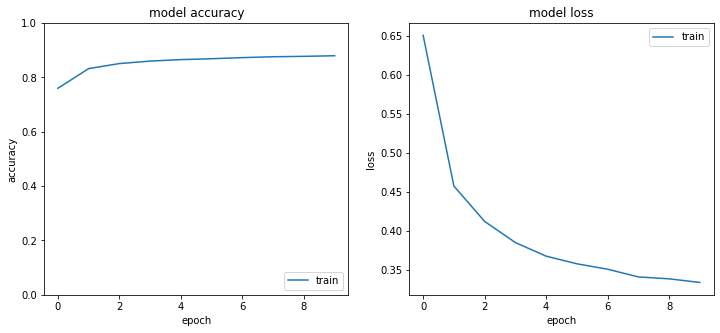

In [74]:
model_mc2 = keras.Sequential([
    keras.layers.Convolution2D(8, kernel_size=(3,3), padding="same", activation='relu', input_shape=(28,28,1)),
    keras.layers.Dropout((0.3)),
    keras.layers.Convolution2D(8, kernel_size=(3,3), padding="same", activation='relu'),
    keras.layers.Dropout((0.3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout((0.3)),
    keras.layers.Convolution2D(16, kernel_size=(3,3), padding="same", activation='relu'),
    keras.layers.Dropout((0.3)),
    keras.layers.Flatten(),
    keras.layers.Dropout((0.3)),
    keras.layers.Dense(9, activation='softmax')
])

model_mc2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_mc2.summary()

import tensorflow.keras.backend as K
model_mc2_pred = K.function([model_mc2.input, K.learning_phase()], [model_mc2.output])

history_mc2 = model_mc2.fit(train_x, train_y, epochs = 10)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_mc2.history['acc'])
#plt.plot(history_b.history['val_accuracy'])
plt.ylim(0,1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history_mc2.history['loss'])
#plt.plot(history_b.history['va_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [16]:
model_mc2.evaluate(test_x_reduced, test_y_reduced) #test the network with adjusted test set

9000/9000 [==============================] - 4s 466us/sample - loss: 0.3184 - acc: 0.8899


[0.3183999333116743, 0.8898889]

In [76]:
model_mc2.save('A_008_model_mc.h5') #save the model

In [15]:
model_mc2 = tf.keras.models.load_model('A_008_model_mc.h5')

In [17]:
import tensorflow.keras.backend as K
model_mc2_pred = K.function([model_mc2.input, K.learning_phase()], [model_mc2.output])

## test with a picture from a class the network has seen before

In [18]:
# set picture
picture = 100
picture_end = picture+1

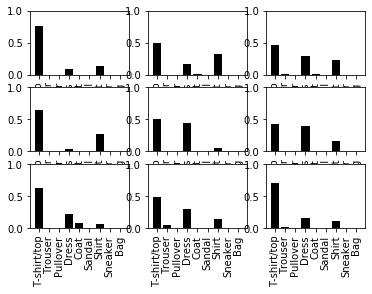

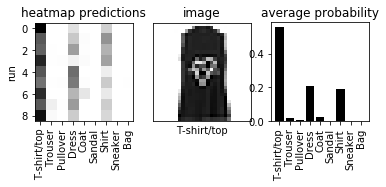

[5.5744916e-01 1.6273227e-02 4.8909485e-03 2.0741175e-01 2.2477996e-02
 6.1358338e-07 1.9004552e-01 1.9986608e-06 1.4489128e-03]


In [19]:
x = [0,1,2,3,4,5,6,7,8]
predictions = model_mc2_pred([zero_x[picture:picture_end], 1])[0]
for i in range(100):
    pred = model_mc2_pred([zero_x[picture:picture_end], 1])[0]
    predictions = np.append(predictions, pred, axis = 0)
    
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.bar(x, predictions[i], color = ['black'])
    plt.xticks(np.arange(9), class_names_adj, rotation = 90)
    #plt.yticks([0.25, 0.5, 0.75, 1.0])
    plt.ylim([0,1])
plt.show()
    #print(i, predictions)
#x = [1,2,3,4,5,6,7,8,9]
#y = pred[0].tolist()
#plt.bar(x, y)
#print(predictions)
plt.subplot(2,3,1)
plt.yticks([0,2,4,6,8])
plt.imshow(predictions[0:9], cmap='binary', interpolation='none')
plt.ylabel('run')
#plt.xlabel('class')
plt.xticks(np.arange(9), class_names_adj, rotation = 90)
plt.title('heatmap predictions')
plt.subplot(2,3,2)
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(zero_x[picture:picture_end][0], axis = 2), cmap=plt.cm.binary)
plt.xlabel(class_names_adj[zero_y[picture_end]])
plt.title('image')

#### try to also show the barchart with the average probability
d = predictions
predictions_mean = d.mean(axis=0)
x = [0,1,2,3,4,5,6,7,8]

plt.subplot(2,3,3)
plt.bar(x,predictions_mean, color = ['black']) #color=(0.3,0.3,0.3,1.0)
plt.xticks(np.arange(9), class_names_adj, rotation = 90)
plt.title('average probability')

plt.show()
print(predictions_mean)

## test with a picture from a class the network has not seen before

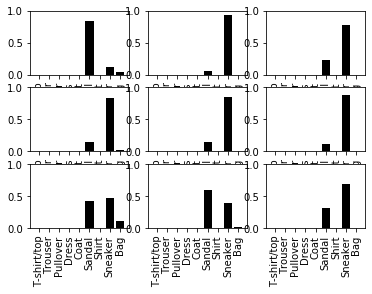

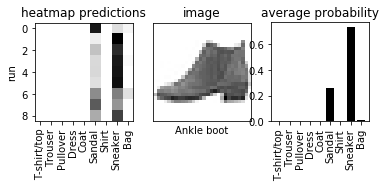

[5.3983975e-05 4.4011006e-07 1.9238085e-05 3.2334822e-06 9.6587508e-05
 2.5669301e-01 8.8287910e-05 7.3425943e-01 8.7859398e-03]


In [20]:
x = [0,1,2,3,4,5,6,7,8]
predictions = model_mc2_pred([nine_x[picture:picture_end], 1])[0]
for i in range(100):
    pred = model_mc2_pred([nine_x[picture:picture_end], 1])[0]
    predictions = np.append(predictions, pred, axis = 0)
    
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.bar(x, predictions[i], color = ['black'])
    plt.xticks(np.arange(9), class_names_adj, rotation = 90)
    #plt.yticks([0.25, 0.5, 0.75, 1.0])
    plt.ylim([0,1])
plt.show()
    #print(i, predictions)
#x = [1,2,3,4,5,6,7,8,9]
#y = pred[0].tolist()
#plt.bar(x, y)
#print(predictions)
plt.subplot(2,3,1)
plt.yticks([0,2,4,6,8])
plt.imshow(predictions[0:9], cmap='binary', interpolation='none')
plt.ylabel('run')
#plt.xlabel('class')
plt.xticks(np.arange(9), class_names_adj, rotation = 90)
plt.title('heatmap predictions')
plt.subplot(2,3,2)
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(nine_x[picture:picture_end][0], axis = 2), cmap=plt.cm.binary)
plt.xlabel(class_names[nine_y[picture_end]])
plt.title('image')

#### try to also show the barchart with the average probability
d = predictions
predictions_mean = d.mean(axis=0)
x = [0,1,2,3,4,5,6,7,8]

plt.subplot(2,3,3)
plt.bar(x,predictions_mean, color = ['black']) #color=(0.3,0.3,0.3,1.0)
plt.xticks(np.arange(9), class_names_adj, rotation = 90)
plt.title('average probability')

plt.show()
print(predictions_mean)

# Compare the two networks with each other

In [19]:
#first on the reduced test set, where the class 9 has been deleted
model_b.evaluate(test_x_reduced, test_y_reduced)

9000/9000 [==============================] - 2s 183us/sample - loss: 2.3807 - acc: 0.2186


[2.380683449215359, 0.21855555]

In [20]:
model_mc2.evaluate(test_x_reduced, test_y_reduced)

9000/9000 [==============================] - 2s 183us/sample - loss: 0.3184 - acc: 0.8899


[0.3183999333116743, 0.8898889]

# Check and quantify BNN

In [21]:
#import the helper functions for evaluation
from helper_functions import b_predict_mc as bpmc
from helper_functions import m_predict_mc as apmc

## Bernoulli Predict

In [30]:
list_of_predictions = [5, 10, 25, 50, 100]
list_of_dev = [0.1, 0.2, 0.3, 0.4, 0.5]

In [25]:
pred = bpmc.b_predict_mc(test_x, model_mc2_pred, 9, 5)

In [34]:
#import pandas as pd
p = pd.DataFrame(pred)
p['soll'] = test_y
#p.to_csv("A_008_test_set_with_predictions_5.csv", ";")

In [35]:
#just the predictions:
(p[0] == test_y).sum()/test_x.shape[0] #0.8805 #07959

0.7939

In [36]:
#for different uncertainty levels
for i in list_of_dev:
    p['unc_est'] = np.where(p[3] >= i, 9, p[0])
    w = (p['unc_est'] == test_y).sum()/test_x.shape[0]
    print(i, ": " , w)

0.1 :  0.7119
0.2 :  0.7119
0.3 :  0.7119
0.4 :  0.7119
0.5 :  0.7939


In [38]:
#evaluate with ranges
for i in list_of_dev:
    for j in list_of_dev:
        if j>i:
                p['unc_est'] = np.where(((p[3] >= i) & (p[3]<=j)), 9, p[0])
                w = (p['unc_est'] == test_y).sum()/test_x.shape[0]
                print(i, "-", j, ": " , w)

0.1 - 0.2 :  0.7939
0.1 - 0.3 :  0.7939
0.1 - 0.4 :  0.7401
0.1 - 0.5 :  0.7119
0.2 - 0.3 :  0.7939
0.2 - 0.4 :  0.7401
0.2 - 0.5 :  0.7119
0.3 - 0.4 :  0.7401
0.3 - 0.5 :  0.7119
0.4 - 0.5 :  0.7119


### plot the results

In [39]:
x = [5, 10, 25, 50, 100]
y = [0.7954, 0.8031, 0.8008, 0.8025, 0.8021]
y50 = [0.7954, 0.7935, 0.7893, 0.7915, 0.7912]
y40 = [0.714, 0.7362, 0.741, 0.7459, 0.75]
y30 = [0.714, 0.6842, 0.7122, 0.7085, 0.709]
y20 = [0.714, 0.6842, 0.6379, 0.656, 0.6632]
y10 = [0.714, 0.6842, 0.6379, 0.6074, 0.5782]

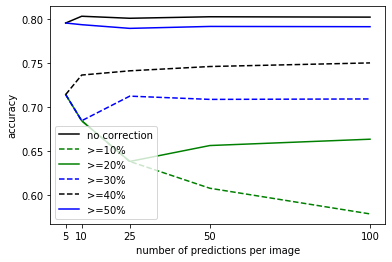

In [40]:
import matplotlib.pyplot as plt

plt.plot(x,y, label='no correction', color='black')
plt.plot(x, y10, label='>=10%', color='green', linestyle='--')
plt.plot(x, y20, label='>=20%', color='green', linestyle='-')
plt.plot(x, y30, label='>=30%', color='blue', linestyle='--')
plt.plot(x, y40, label='>=40%', color='black', linestyle='--')
plt.plot(x, y50, label='>=50%', color='blue', linestyle='-')

plt.xlabel('number of predictions per image')
plt.ylabel('accuracy')
plt.xticks(list_of_predictions)
#plt.yticks(list_of_dev)

plt.legend(loc='lower left')
plt.show()

## Average prediction

In [41]:
pred = apmc.avg_predict_mc(test_x, model_mc2_pred, 9, 5)

C:\Users\annar\MAS Data Science\Masterarbeit\helper_functions\m_predict_mc.py:17: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  max_value = mean.argmax()


In [42]:
df = pd.DataFrame(pred)
df['soll'] = test_y
df.to_csv("A_009_test_with_max_pred_5.csv", ";")

In [43]:
#just the predictions:
(df[0] == test_y).sum()/test_x.shape[0]

0.7977

In [44]:
#for different uncertainty levels
for i in list_of_dev:
    df['unc_est'] = np.where(df[3] >= i, 9, df[0])
    w = (df['unc_est'] == test_y).sum()/test_x.shape[0]
    print(i, ": " , w)

0.1 :  0.6239
0.2 :  0.7467
0.3 :  0.8001
0.4 :  0.7996
0.5 :  0.7978


In [45]:
#evaluate with ranges
for i in list_of_dev:
    for j in list_of_dev:
        if j>i:
                df['unc_est'] = np.where(((df[3] >= i) & (df[3]<=j)), 9, df[0])
                w = (df['unc_est'] == test_y).sum()/test_x.shape[0]                
                print(i, "-", j, ": " , w)
            

0.1 - 0.2 :  0.6749
0.1 - 0.3 :  0.6215
0.1 - 0.4 :  0.622
0.1 - 0.5 :  0.6238
0.2 - 0.3 :  0.7443
0.2 - 0.4 :  0.7448
0.2 - 0.5 :  0.7466
0.3 - 0.4 :  0.7982
0.3 - 0.5 :  0.8
0.4 - 0.5 :  0.7995


## graphic

In [46]:
x = [5, 10, 25, 50, 100]
y = [0.7979, 0.7997, 0.8022, 0.8038, 0.8029]
y50 = [0.798, 0.7997, 0.8022, 0.8038, 0.8029]
y40 = [0.8005, 0.8006, 0.8023, 0.8038, 0.8029]
y30 = [0.8033, 0.8124, 0.8144, 0.8184, 0.8174]
y20 = [0.7498, 0.7577, 0.7635, 0.765, 0.7685]
y10 = [0.6175, 0.5949, 0.5841, 0.5795, 0.575]

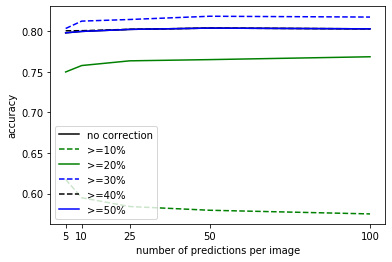

In [47]:
import matplotlib.pyplot as plt

plt.plot(x,y, label='no correction', color='black')
plt.plot(x, y10, label='>=10%', color='green', linestyle='--')
plt.plot(x, y20, label='>=20%', color='green', linestyle='-')
plt.plot(x, y30, label='>=30%', color='blue', linestyle='--')
plt.plot(x, y40, label='>=40%', color='black', linestyle='--')
plt.plot(x, y50, label='>=50%', color='blue', linestyle='-')

plt.xlabel('number of predictions per image')
plt.ylabel('accuracy')
plt.xticks(list_of_predictions)
#plt.yticks(list_of_dev)

plt.legend(loc='lower left')
plt.show()